In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import Bio
from Bio.PDB import *
print("Biopython v" + Bio.__version__)
%matplotlib inline

Biopython v1.79


In [2]:
def compute_distance_matrix(structure):
    """
    Compute the distance matrix for a given protein structure.
    
    Parameters:
        - structure: Bio.PDB structure object
        
    Returns:
        - distance_matrix: 2D numpy array representing the distance matrix
    """
    atoms = list(structure.get_atoms())
    num_atoms = len(atoms)
    distance_matrix = np.zeros((num_atoms, num_atoms))

    for i in range(num_atoms):
        for j in range(i+1, num_atoms):
            distance_matrix[i, j] = distance_matrix[j, i] = atoms[i] - atoms[j]

    return distance_matrix

In [3]:
# Load the PDB file containing the protein complex structure
parser = PDBParser()
structure = parser.get_structure("1brs_ref.pdb", "1brs_ref.pdb")

In [4]:
# Compute the distance matrix
distance_matrix = compute_distance_matrix(structure)

In [5]:
print(distance_matrix)
#np.save("distance_matrix.npy", distance_matrix)

[[ 0.          1.46663916  2.49037409 ... 50.47344208 51.40073776
  50.14730072]
 [ 1.46663916  0.          1.55313933 ... 49.12960815 50.0659523
  48.79221344]
 [ 2.49037409  1.55313933  0.         ... 48.05876923 48.97675705
  47.73880005]
 ...
 [50.47344208 49.12960815 48.05876923 ...  0.          1.22924817
   1.25705552]
 [51.40073776 50.0659523  48.97675705 ...  1.22924817  0.
   2.20714068]
 [50.14730072 48.79221344 47.73880005 ...  1.25705552  2.20714068
   0.        ]]


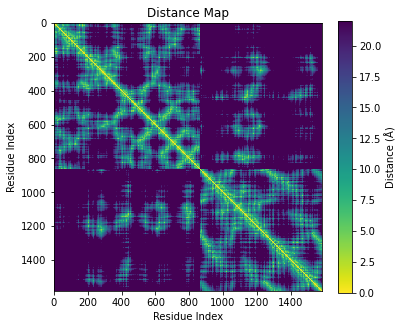

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

fig = plt.figure(figsize=(6, 5))
im = plt.imshow(distance_matrix, cmap='viridis_r', interpolation='none', vmin='0.0', vmax='22.0')  # cutofff=22 Å 
# 设置坐标轴的lable
plt.xlabel('Residue Index')
plt.ylabel('Residue Index')
cb = plt.colorbar(im)
# COLORBAR
# set colorbar label plus label color
plt.title('Distance Map')
cb.set_label('Distance (Å)')
fig.savefig('distmap_ppcomplex.png',dpi=300)